In [1]:
# from images import bigpycraft_bda as bpc
from IPython.display import Image 

import platform

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.rcParams["figure.figsize"] = [12,6]

%matplotlib inline

In [3]:
df_cctv=pd.read_csv("./data/cctv.csv",encoding="utf-8")
df_cctv.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [4]:
df_cctv.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [6]:
df_cctv.rename(columns={df_cctv.columns[0] : '구'}, inplace=True)
df_cctv.rename(columns={df_cctv.columns[1] : 'CCTV수'}, inplace=True)
df_cctv.head()

,구,CCTV수,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [7]:
df_cctv.sort_values(by='CCTV수', ascending=True).head(10) #내림차순

,구,CCTV수,2013년도 이전,2014년,2015년,2016년
9,도봉구,825,238,159,42,386
2,강북구,831,369,120,138,204
5,광진구,878,573,78,53,174
3,강서구,911,388,258,184,81
24,중랑구,916,509,121,177,109
12,마포구,980,314,118,169,379
1,강동구,1010,379,99,155,377
23,중구,1023,413,190,72,348
17,송파구,1081,529,21,68,463
13,서대문구,1254,844,50,68,292


In [9]:
df_cctv.sort_values(by='CCTV수', ascending=False).head(10) #오름차순

,구,CCTV수,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
18,양천구,2482,1843,142,30,467
14,서초구,2297,1406,157,336,398
4,관악구,2109,846,260,390,613
21,은평구,2108,1138,224,278,468
20,용산구,2096,1368,218,112,398
6,구로구,1884,1142,173,246,323
10,동대문구,1870,1070,23,198,579
16,성북구,1651,1009,78,360,204
22,종로구,1619,464,314,211,630


In [11]:
df_cctv['최근증가율'] = (df_cctv['2016년'] + df_cctv['2015년'] + df_cctv['2014년']) / df_cctv['2013년도 이전']  * 100
df_cctv.head()

,구,CCTV수,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,150.619195
1,강동구,1010,379,99,155,377,166.490765
2,강북구,831,369,120,138,204,125.203252
3,강서구,911,388,258,184,81,134.793814
4,관악구,2109,846,260,390,613,149.290780


In [12]:
df_cctv.sort_values(by='최근증가율', ascending=False).head(10)

,구,CCTV수,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911
8,노원구,1566,542,57,451,516,188.929889
1,강동구,1010,379,99,155,377,166.490765
19,영등포구,1277,495,214,195,373,157.979798
0,강남구,3238,1292,430,584,932,150.619195
4,관악구,2109,846,260,390,613,149.290780
23,중구,1023,413,190,72,348,147.699758
11,동작구,1302,544,341,103,314,139.338235


In [13]:
df_seoul=pd.read_excel("./data/Report_seoul_population_2019_2Q.xls",encoding="utf-8")
df_seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2019.2/4,합계,4304243,10041574,4899133,5142441,9757144,4762711,4994433,284430,136422,148008,2.27,1451564
3,2019.2/4,종로구,73828,162413,78657,83756,152026,74190,77836,10387,4467,5920,2.06,27155
4,2019.2/4,중구,62156,136276,66919,69357,126143,62086,64057,10133,4833,5300,2.03,22749


In [14]:
population = pd.read_excel("./data/Report_seoul_population_2019_2Q.xls",
                           header = 2,
                           usecols = "B, C, D, G, J, N",
                           encoding = "utf-8" 
                          )
population.head()

,자치구,세대,계,계.1,계.2,65세이상고령자
0,합계,4304243,10041574,9757144,284430,1451564
1,종로구,73828,162413,152026,10387,27155
2,중구,62156,136276,126143,10133,22749
3,용산구,109692,245069,229122,15947,38259
4,성동구,136872,312991,304936,8055,43370


In [15]:
population.rename(columns={population.columns[0] : '구', 
                           population.columns[1] : '세대수', 
                           population.columns[2] : '인구수', 
                           population.columns[3] : '한국인', 
                           population.columns[4] : '외국인', 
                           population.columns[5] : '고령자'}, inplace=True)
population.head()

,구,세대수,인구수,한국인,외국인,고령자
0,합계,4304243,10041574,9757144,284430,1451564
1,종로구,73828,162413,152026,10387,27155
2,중구,62156,136276,126143,10133,22749
3,용산구,109692,245069,229122,15947,38259
4,성동구,136872,312991,304936,8055,43370


In [16]:
population.drop([0], inplace=True)
population.head()

,구,세대수,인구수,한국인,외국인,고령자
1,종로구,73828,162413,152026,10387,27155
2,중구,62156,136276,126143,10133,22749
3,용산구,109692,245069,229122,15947,38259
4,성동구,136872,312991,304936,8055,43370
5,광진구,163914,369470,353878,15592,46773


In [17]:
population['구'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [18]:
population['외국인비율'] = population['외국인'] / population['인구수'] * 100
population['고령자비율'] = population['고령자'] / population['인구수'] * 100
population.head()

,구,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,73828,162413,152026,10387,27155,6.395424,16.719721
2,중구,62156,136276,126143,10133,22749,7.435645,16.693328
3,용산구,109692,245069,229122,15947,38259,6.507147,15.611522
4,성동구,136872,312991,304936,8055,43370,2.573556,13.856628
5,광진구,163914,369470,353878,15592,46773,4.220099,12.659485


# Tip. DataFrame 병합

In [20]:
?pd.concat

In [21]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'], 
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                   index=[4, 5, 6, 7])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                   index=[8, 9, 10, 11])

In [22]:
result = pd.concat([df1, df2, df3]) #= pd.concat([df1, df4], axis=0)   
# 전체적으로 그냥 붙여 넣기
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [23]:
result = pd.concat([df1, df2, df3], keys=['x', 'y', 'z'])
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [25]:
result.index #인덱스 값 찾아주기

MultiIndex(levels=[['x', 'y', 'z'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]],
           codes=[[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]])

In [27]:
result.index.get_level_values(0)

Index(['x', 'x', 'x', 'x', 'y', 'y', 'y', 'y', 'z', 'z', 'z', 'z'], dtype='object')

In [29]:
result.index.get_level_values(1)

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

In [30]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'], 
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                   index=[2, 3, 6, 7])

In [31]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [32]:
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [33]:
result = pd.concat([df1, df4], axis=1)
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [34]:
result = pd.concat([df1, df4], axis=1, join='inner') #모두 값이 있는 것만
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [36]:
result = pd.concat([df1, df4], axis=1, join='outer') #그냥 전체적인 값
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [37]:
result = pd.concat([df1, df4], axis=1, join_axes=[df1.index]) #df1을 기준으로
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [38]:
result = pd.concat([df1, df4], ignore_index=True)
result

C:\Users\202-006\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [40]:
pd.merge(df1, df4, on='B') #공통으로 있는 B값에 관한 것만

,A,B,C,D_x,D_y,F
0,A2,B2,C2,D2,D2,F2
1,A3,B3,C3,D3,D3,F3


In [44]:
pd.merge(df1, df4,how="outer", on='B')

,A,B,C,D_x,D_y,F
0,A0,B0,C0,D0,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN
2,A2,B2,C2,D2,D2,F2
3,A3,B3,C3,D3,D3,F3
4,NaN,B6,NaN,NaN,D6,F6
5,NaN,B7,NaN,NaN,D7,F7


In [45]:
pd.merge(df1, df4,how="inner", on='B')

,A,B,C,D_x,D_y,F
0,A2,B2,C2,D2,D2,F2
1,A3,B3,C3,D3,D3,F3


## CCTV 데이터와 인구 데이터 합치고 분석

In [47]:
data_result = pd.merge(df_cctv, population, on='구')
data_result.head()

,구,CCTV수,2013년도 이전,2014년,2015년,2016년,최근증가율,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,150.619195,230752,547602,542498,5104,69011,0.932064,12.602401
1,강동구,1010,379,99,155,377,166.490765,177368,428547,424235,4312,60657,1.006191,14.154107
2,강북구,831,369,120,138,204,125.203252,143650,319377,315587,3790,59189,1.186685,18.532643
3,강서구,911,388,258,184,81,134.793814,261383,602230,595602,6628,81965,1.100576,13.610249
4,관악구,2109,846,260,390,613,149.290780,266692,519864,502089,17775,73693,3.419163,14.175438


In [48]:
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,구,CCTV수,최근증가율,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,150.619195,230752,547602,542498,5104,69011,0.932064,12.602401
1,강동구,1010,166.490765,177368,428547,424235,4312,60657,1.006191,14.154107
2,강북구,831,125.203252,143650,319377,315587,3790,59189,1.186685,18.532643
3,강서구,911,134.793814,261383,602230,595602,6628,81965,1.100576,13.610249
4,관악구,2109,149.290780,266692,519864,502089,17775,73693,3.419163,14.175438


In [49]:
data_result.set_index('구', inplace=True)
data_result.head()

,CCTV수,최근증가율,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구,,,,,,,,,
강남구,3238,150.619195,230752,547602,542498,5104,69011,0.932064,12.602401
강동구,1010,166.490765,177368,428547,424235,4312,60657,1.006191,14.154107
강북구,831,125.203252,143650,319377,315587,3790,59189,1.186685,18.532643
강서구,911,134.793814,261383,602230,595602,6628,81965,1.100576,13.610249
관악구,2109,149.290780,266692,519864,502089,17775,73693,3.419163,14.175438


In [50]:
np.corrcoef(data_result['고령자비율'],data_result['CCTV수'])

array([[ 1.        , -0.28763796],
       [-0.28763796,  1.        ]])

## CCTV와 인구현황 그래프로 분석

In [51]:
import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set()

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.rcParams["figure.figsize"] = [12,6]

%matplotlib inline


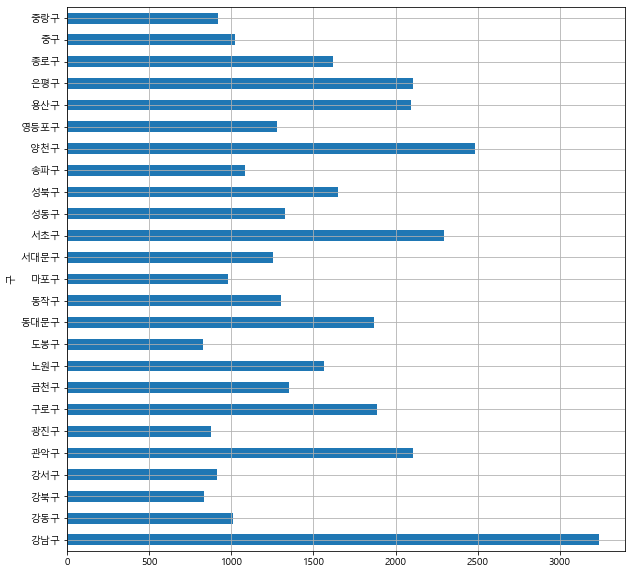

In [56]:
plt.figure(figsize=(10,10))
data_result['CCTV수'].plot(kind='barh', grid=True)
plt.show()

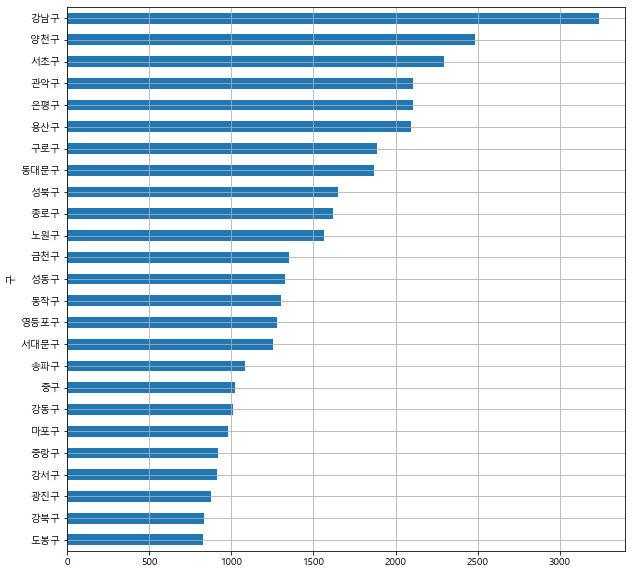

In [53]:
data_result['CCTV수'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

In [54]:
data_result['CCTV비율'] = data_result['CCTV수'] / data_result['인구수'] * 100
data_result.head()

,CCTV수,최근증가율,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구,,,,,,,,,,
강남구,3238,150.619195,230752,547602,542498,5104,69011,0.932064,12.602401,0.591305
강동구,1010,166.490765,177368,428547,424235,4312,60657,1.006191,14.154107,0.235680
강북구,831,125.203252,143650,319377,315587,3790,59189,1.186685,18.532643,0.260194
강서구,911,134.793814,261383,602230,595602,6628,81965,1.100576,13.610249,0.151271
관악구,2109,149.290780,266692,519864,502089,17775,73693,3.419163,14.175438,0.405683


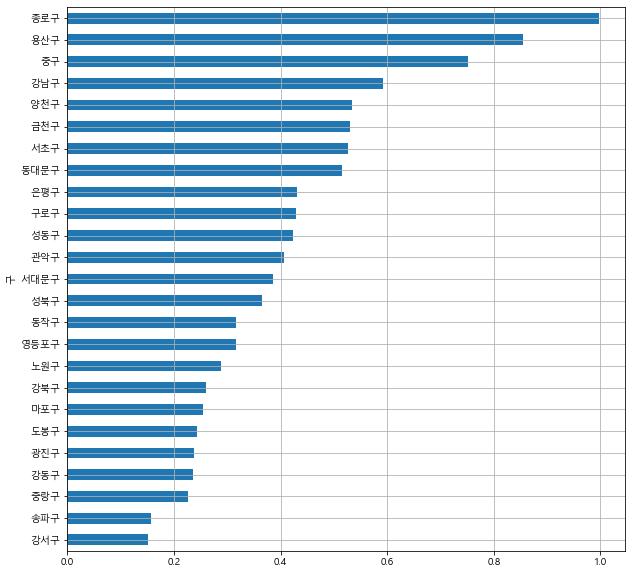

In [55]:
data_result['CCTV비율'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

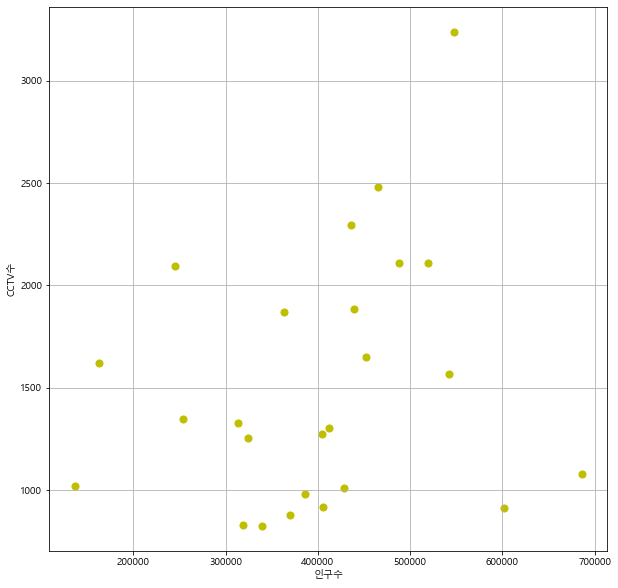

In [57]:
plt.figure(figsize=(10, 10))
plt.scatter(data_result['인구수'], data_result['CCTV수'], s=50,color="y")
plt.xlabel('인구수') #인구 수와 cctv 수의 상관관계
plt.ylabel('CCTV수')
plt.grid()
plt.show()

In [58]:
fp1 = np.polyfit(data_result['인구수'], data_result['CCTV수'], 1)
#np.polyfit 최소제곱(data1,data2,차원)
fp1

array([1.05399766e-03, 1.09196818e+03])

In [59]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100) #죄표(시작,끝,개수) 시작에서 끝까지 개수만큼

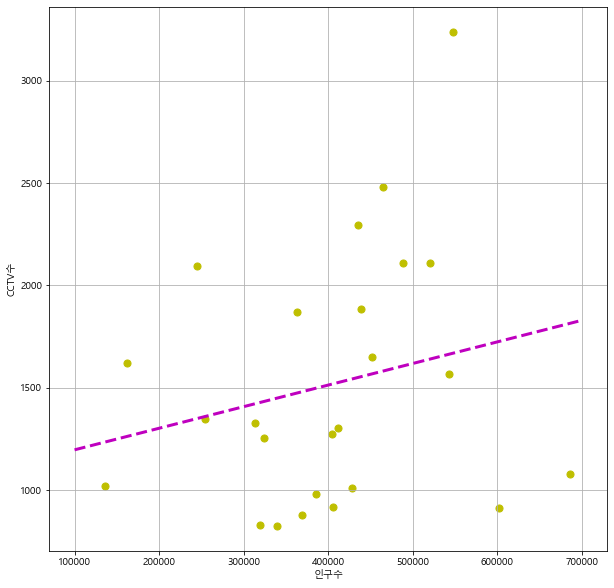

In [62]:
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['CCTV수'], s=50 ,color="y")
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='m') #ls='dashed' : 점선
plt.xlabel('인구수')
plt.ylabel('CCTV수')
plt.grid()
plt.show()

## 그래프에 의미 부여

In [63]:
fp1 = np.polyfit(data_result['인구수'], data_result['CCTV수'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

data_result['오차'] = np.abs(data_result['CCTV수'] - f1(data_result['인구수']))

df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,CCTV수,최근증가율,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구,,,,,,,,,,,
강남구,3238,150.619195,230752,547602,542498,5104,69011,0.932064,12.602401,0.591305,1568.860593
양천구,2482,34.671731,177045,465095,461051,4044,59731,0.869500,12.842753,0.533654,899.822778
강서구,911,134.793814,261383,602230,595602,6628,81965,1.100576,13.610249,0.151271,815.717191
서초구,2297,63.371266,172907,435631,431360,4271,55853,0.980417,12.821172,0.527281,745.877765
용산구,2096,53.216374,109692,245069,229122,15947,38259,6.507147,15.611522,0.855269,745.729667


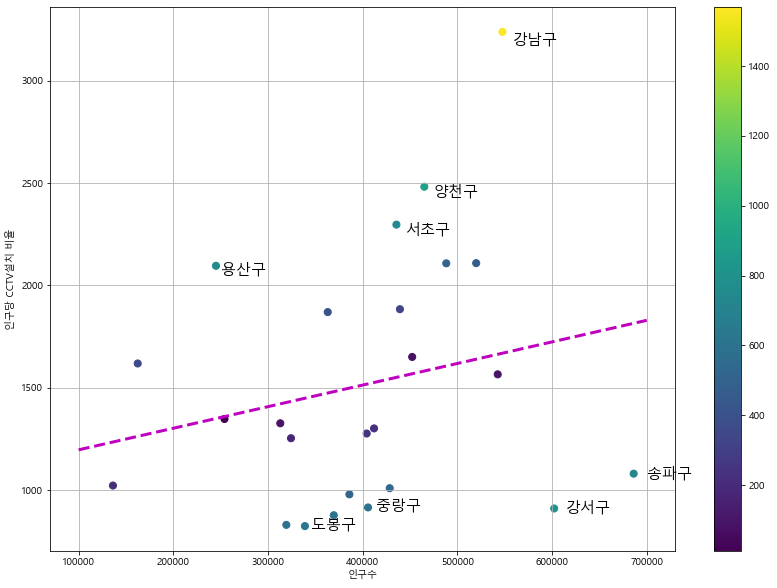

In [66]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'], data_result['CCTV수'], 
            c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='m')

for n in range(8): #8개에 이름 넣기
    plt.text(df_sort['인구수'][n]*1.02, df_sort['CCTV수'][n]*0.98, #1.02,0.98은 글씨위치
             df_sort.index[n], fontsize=15)
    
plt.xlabel('인구수')
plt.ylabel('인구당 CCTV설치 비율')
plt.colorbar()
plt.grid()
plt.show()

In [67]:
#저장하기
df_sort.to_csv('data/seoul_population_cctv.csv', sep=',', index=True, encoding='euc-kr')